In [1]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [3]:
state_pop = pd.read_csv("data/nst-est2018-alldata.csv")
state_pop

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769
5,40,3,6,1,Alabama,4779736,4780138,4785448,4798834,4815564,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
6,40,4,9,2,Alaska,710231,710249,713906,722038,730399,...,-14.508975,-14.557034,0.474949,1.496795,-0.903612,-11.375421,-7.968225,-3.911968,-11.005272,-11.306342
7,40,4,8,4,Arizona,6392017,6392288,6407774,6473497,6556629,...,8.993644,11.707025,4.302215,7.038612,6.464858,9.347708,9.662843,12.020279,11.029897,13.723125
8,40,3,7,5,Arkansas,2915918,2916028,2921978,2940407,2952109,...,1.335801,0.822693,3.145819,0.916417,0.114350,-0.039479,1.093820,1.534978,2.063267,1.573921
9,40,4,9,6,California,37253956,37254523,37320903,37641823,37960782,...,-3.501098,-3.953271,1.376097,1.699095,1.847889,2.402701,2.159548,0.670554,-0.454811,-0.969421


In [4]:
# merge shapefile with population data
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")

In [5]:
%matplotlib inline

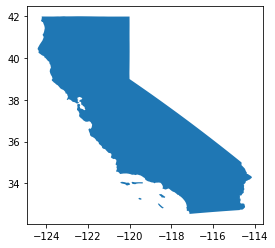

In [6]:
usa[usa.NAME=="California"].plot()

In [7]:
capitals = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Create a subset of the world data that is just the South American continent
south_america = world[world["continent"] == "South America"]

# Create a custom polygon
polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

In [8]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]
    })

In [9]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


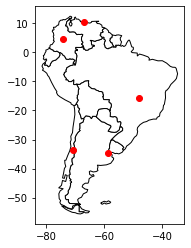

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [11]:
usa_cities = gpd.read_file(gplt.datasets.get_path("usa_cities"))
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


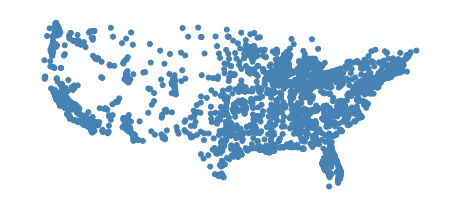

In [12]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

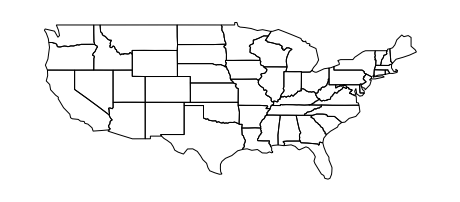

In [13]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

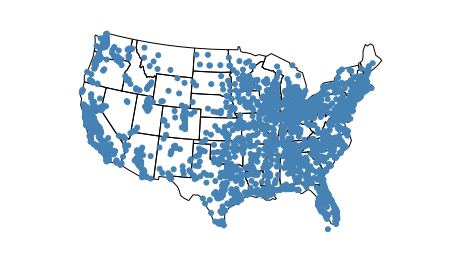

In [14]:
# overplotting
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

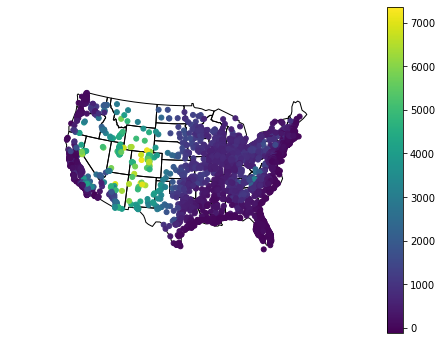

In [15]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', legend=True)

Text(0.5, 1.0, 'Cities in the Continental United States by Elevation')

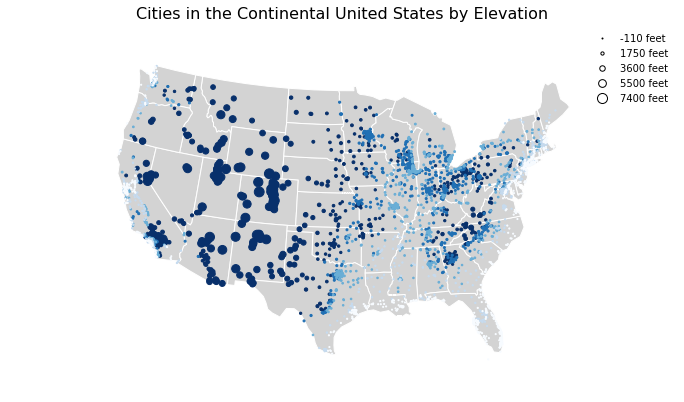

In [16]:
ax = gplt.polyplot(
    contiguous_usa, 
    edgecolor='white', facecolor='lightgray',
    figsize=(12, 8),
    projection=gcrs.AlbersEqualArea()
)
gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='Blues',
    scheme='quantiles',
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110 feet', '1750 feet', '3600 feet', '5500 feet', '7400 feet']
)
ax.set_title('Cities in the Continental United States by Elevation', fontsize=16)

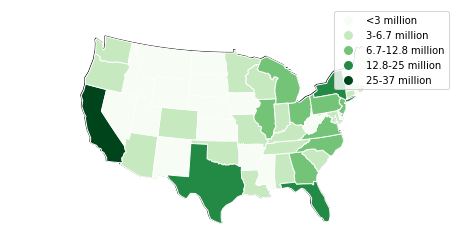

In [17]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    contiguous_usa, hue='population',
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True,
    scheme='FisherJenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

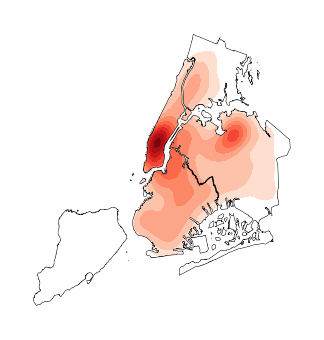

In [18]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.kdeplot(collisions, cmap='Reds', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)

In [19]:
obesity = pd.read_csv(gplt.datasets.get_path('obesity_by_state'), sep='\t')
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [20]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [21]:
result = contiguous_usa.set_index('state').join(obesity.set_index('State'))
result.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


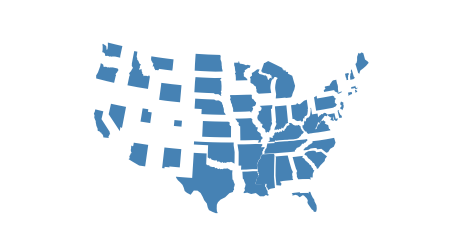

In [22]:
gplt.cartogram(result, scale='Percent', projection=gcrs.AlbersEqualArea())


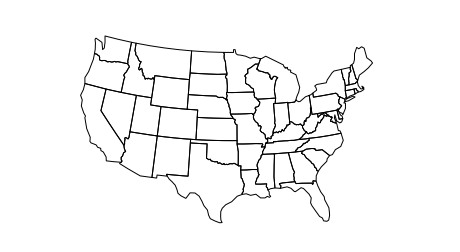

In [23]:
gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())